In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [104]:
df = pd.read_csv('data/LogisticRegression/Social_Network_Ads.csv', encoding='utf-8')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [105]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)

In [5]:
df.to_csv('data/LogisticRegression/Social_Network_Ads_label_encoded.csv',index=None)

In [106]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [107]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [108]:
X = df.drop(['User ID', 'Purchased'], axis=1)
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(320, 3)
(80, 3)


In [109]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier(n_estimators=100)]

In [113]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp


C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishih\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.662500,0.000000,0.000000,0.000000,0.5625,0.000000,0.000000,0.000000
1,KNeighborsClassifier,0.871875,0.903614,0.694444,0.785340,0.7125,0.833333,0.428571,0.566038
2,SVC,0.787500,0.857143,0.444444,0.585366,0.6750,0.800000,0.342857,0.480000
3,GaussianNB,0.896875,0.871287,0.814815,0.842105,0.8500,0.870968,0.771429,0.818182
4,DecisionTreeClassifier,0.928125,0.851240,0.953704,0.899563,0.8625,0.833333,0.857143,0.845070
5,RandomForestClassifier,0.931250,0.864407,0.944444,0.902655,0.8500,0.828571,0.828571,0.828571
6,GradientBoostingClassifier,0.978125,0.990291,0.944444,0.966825,0.8000,0.806452,0.714286,0.757576


In [114]:
X_train.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [115]:
from sklearn.preprocessing import StandardScaler

scaling_columns = ['Age', 'EstimatedSalary']
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [116]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.859375,0.838710,0.722222,0.776119,0.8250,0.838710,0.742857,0.787879
1,KNeighborsClassifier,0.931250,0.877193,0.925926,0.900901,0.8750,0.878788,0.828571,0.852941
2,SVC,0.918750,0.847458,0.925926,0.884956,0.8500,0.848485,0.800000,0.823529
3,GaussianNB,0.896875,0.871287,0.814815,0.842105,0.8500,0.870968,0.771429,0.818182
4,DecisionTreeClassifier,0.928125,0.851240,0.953704,0.899563,0.8625,0.833333,0.857143,0.845070
5,RandomForestClassifier,0.931250,0.858333,0.953704,0.903509,0.8375,0.823529,0.800000,0.811594
6,GradientBoostingClassifier,0.978125,0.990291,0.944444,0.966825,0.8000,0.806452,0.714286,0.757576


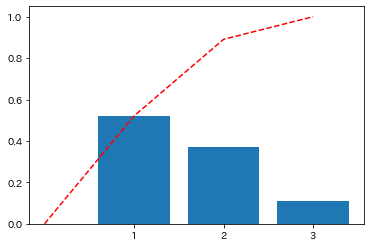

In [117]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

X_train_pca = pd.DataFrame(X_train_pca[:,:2], columns=['PC1', 'PC2'])
X_test_pca = pd.DataFrame(X_test_pca[:,:2], columns=['PC1', 'PC2'])

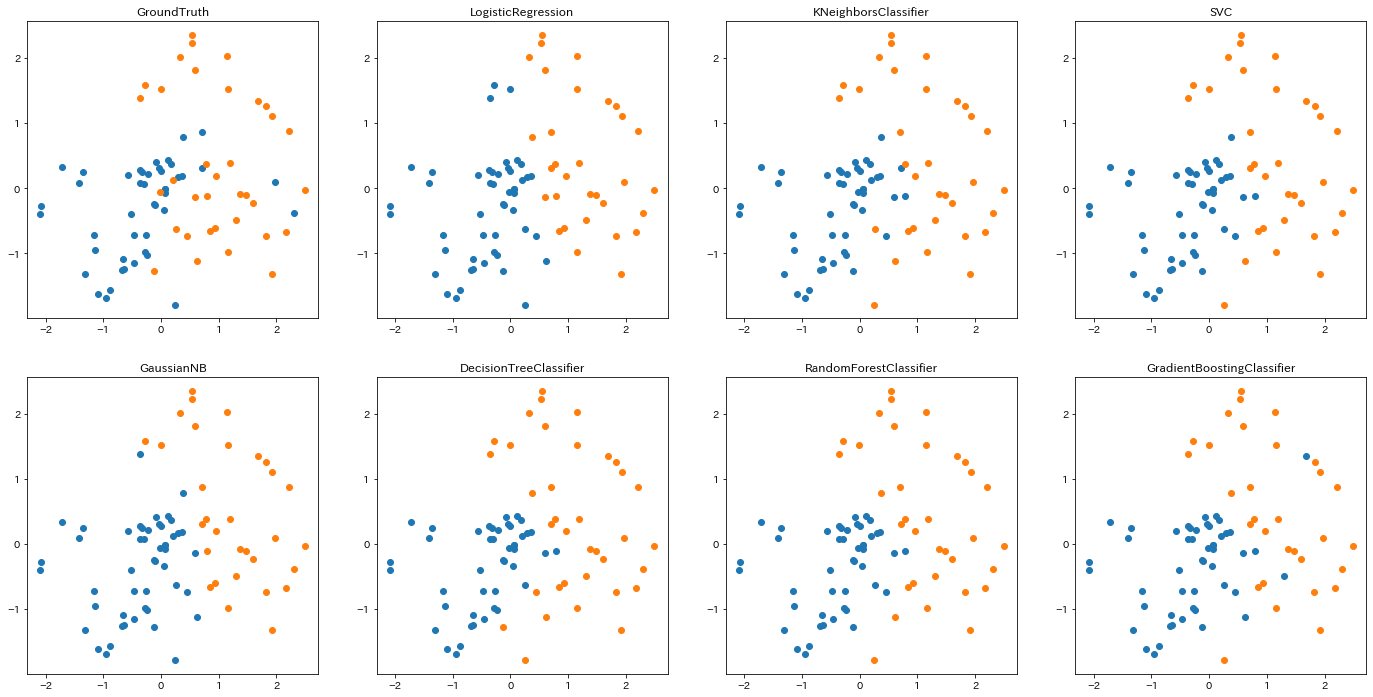

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.859375,0.838710,0.722222,0.776119,0.8250,0.838710,0.742857,0.787879
1,KNeighborsClassifier,0.931250,0.877193,0.925926,0.900901,0.8750,0.878788,0.828571,0.852941
2,SVC,0.918750,0.847458,0.925926,0.884956,0.8500,0.848485,0.800000,0.823529
3,GaussianNB,0.896875,0.871287,0.814815,0.842105,0.8500,0.870968,0.771429,0.818182
4,DecisionTreeClassifier,0.928125,0.851240,0.953704,0.899563,0.8625,0.833333,0.857143,0.845070
5,RandomForestClassifier,0.937500,0.872881,0.953704,0.911504,0.8375,0.823529,0.800000,0.811594
6,GradientBoostingClassifier,0.978125,0.990291,0.944444,0.966825,0.8000,0.806452,0.714286,0.757576


In [118]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred)
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred)
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred)
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred)
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred)
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred)
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp